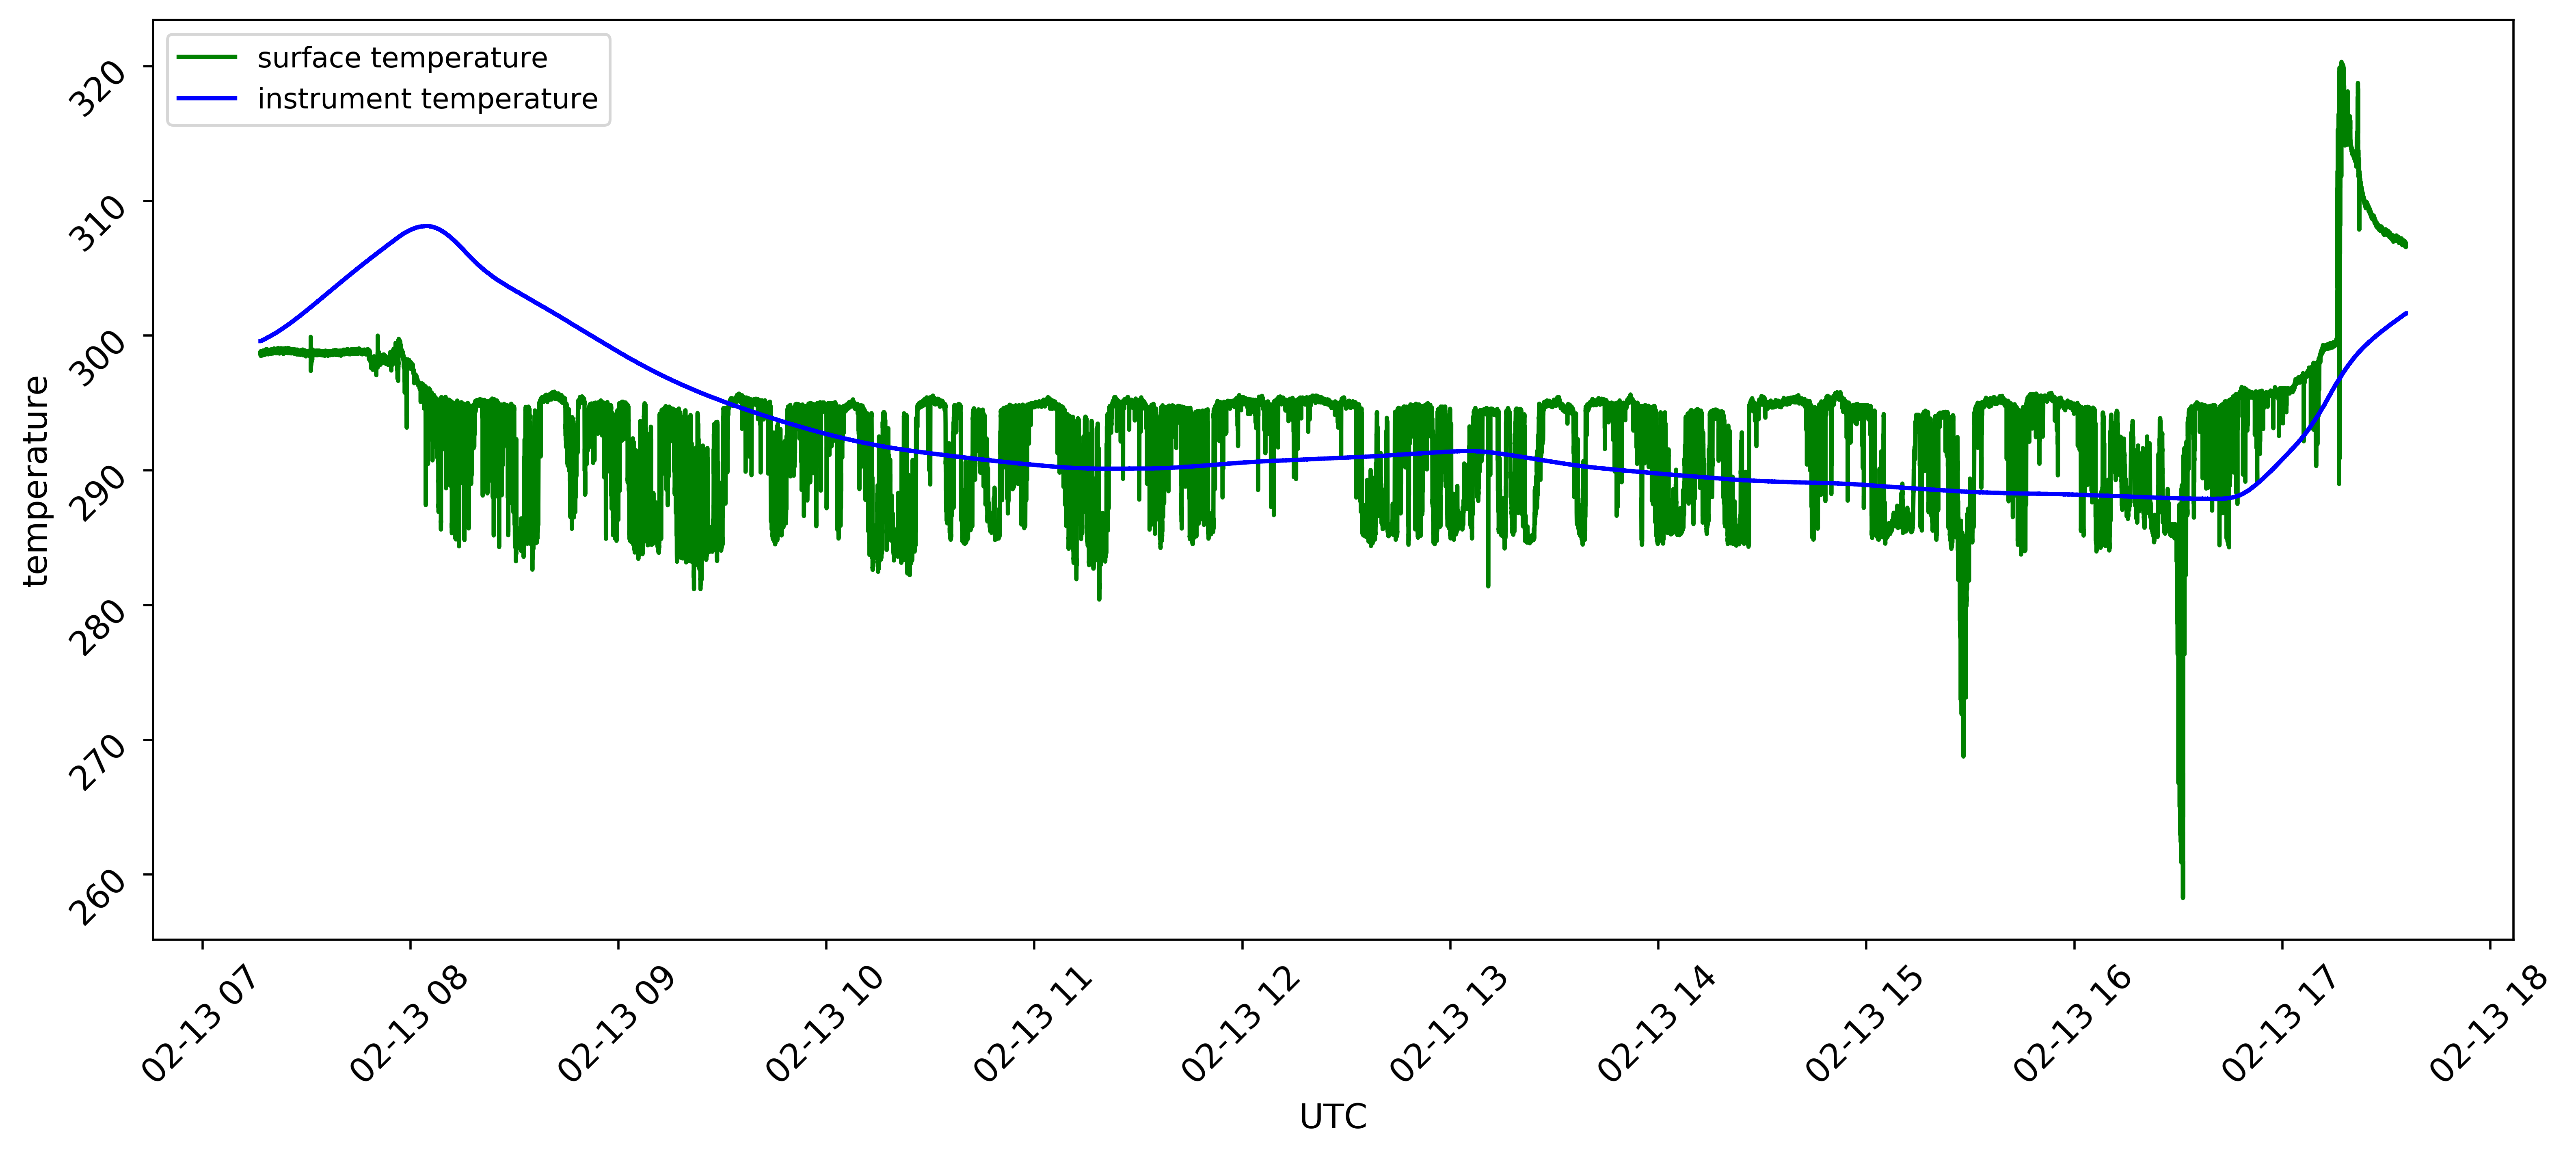

In [9]:
%matplotlib inline
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
read_files = glob.glob(os.path.join("KT19_20200213_*.dat"))
array = []
for files in read_files:
    data = pd.read_csv(files, header = 0)
    array.append(data)
#    print(files)
merge_values = np.vstack(array)
df_KT19 = pd.DataFrame(merge_values) 
df_KT19.to_csv('data_KT19.csv', header=None,index=False)
KT19_22_jan = pd.read_csv('data_KT19.csv', delim_whitespace=True, header=None)
KT19_22_jan.columns = ['date','hours','minutes','seconds','temperature','calibration_factor_1','calibration_factor_2','instrument_temp']
hour = [] 
for i in KT19_22_jan.hours:
    hour.append('{:02}'.format(i))
hour = pd.DataFrame(hour)
KT19_22_jan= pd.concat([hour,KT19_22_jan], axis = 1)
Min = [] 
for i in KT19_22_jan.minutes:
    Min.append('{:02}'.format(i))
Min = pd.DataFrame(Min)
KT19_22_jan= pd.concat([Min,KT19_22_jan], axis = 1)
KT19_22_jan.columns = ['Min','hour','date','hours','minutes','seconds','temperature','calibration_factor_1','calibration_factor_2','instrument_temp']
KT19_22_jan['time'] = KT19_22_jan.date.astype(str).str.cat(KT19_22_jan[['hour','Min','seconds']].astype(str))
KT19_22_jan["time"]= KT19_22_jan["time"].astype(str) 
#KT19_22_jan.to_csv('KT19_22_jan.csv')
my_date = []
for m in KT19_22_jan.time:
    date = datetime.strptime(m, "%Y%m%d%H%M%S.%f")
    my_date.append(date)
my_date = pd.DataFrame(my_date)
KT19_22 = pd.concat([my_date,KT19_22_jan.temperature,KT19_22_jan.time,KT19_22_jan.instrument_temp], axis = 1)
KT19_22.columns = ['datetime', 'temperature','time','instrument_temp']
plt.figure(figsize=(15,6),dpi=500)
plt.plot(KT19_22.datetime,KT19_22.temperature, 'g', label = 'surface temperature')
plt.plot(KT19_22.datetime,KT19_22.instrument_temp, 'b', label = 'instrument temperature')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=45)
plt.xlabel('UTC',fontsize=12)
plt.ylabel('temperature',fontsize=12)
plt.legend()
plt.show()